# Individual Assignment: Classifying Risk of Heart Attack
## Trimester Feb 2025

In this assignment, you shall implement an L-layer standard neural network. We shall train the network to classify if a patient is in danger of an imminent heart attack. This is an individual Assignment contributing 10 marks for the course. It is divided into 2 parts. 
* Part A: Coding (60%)
    * Implement an L-layered neural network from scratch with numpy library.
    * Deadline: 20 July 2025 (Week 4, Sunday Midnight)
* Part B: Theory (40%)
    * This is a quiz on the implementation for this assignment, covering both theory and coding aspects. The quiz wil be conducted during lecture class.
    * Date: 23 July 2025 (Week 5, Wed during class)
    * Duration: 25 minutes

---
**Instruction**: 

1. Install **Anaconda** on your **local** machine and work on your assignment using `jupyter notebook`.
2. Write your **name** and **student ID** at the top part of `a1_mlp.py`.
3. Write your answer in the following designated areas as shown in the following. **Do not change** any non-designated areas. 
    ``` python
    ### BEGIN CODE HERE ###
    # ... Implement your code in this designated area only.
    ### END CODE HERE ### 
    ``` 
    <br>  
4. In this assignment, you are expected to use only the `sklearn` and `numpy` packages to implement the standard neural network from scratch. Do **not** import any other package, module, function or class other than those that have already been imported at `a1_mlp.py`. Do **not** use `pytorch` or other deep learning framework to implement the tasks.
5. **Submission instruction** for Part A:
   - **Rename** `a1_mlp.py` as "`<your id>_a1_mlp.py`" and submit it through WBLE. You do not need to submit this notebook file.


In [1]:
from importlib import reload

import a1_mlp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

## Section 1 : Loading the Dataset

Load the dataset into a dataframe. The dataset comprises the information for $M = 303$ patients. For each person, $F_x = 13$ input attributes are collected. The targeted variable is the column `heart_attack_risk` where:

1. `heart_attack_risk` = 0: no risk of heart attack
2. `heart_attack_risk` = 1: high risk of heart attack

In [2]:
df = pd.read_csv('dataset.csv')
df.sample(5)

,heart_attack_risk,age,gender,chest_pain_type,max_heart_rate,resting_ecg,resting_bp,cholestrol,num_major_vessels,fasting_bloodsugar,exercise_induced_angina,thal_rate,oldpeak,slope
52,0,56,1,0,144,0,125,249,1,1,1,2,1.2,1
213,1,52,0,2,169,0,136,196,0,0,0,2,0.1,1
256,1,58,0,0,131,1,130,197,0,0,0,2,0.6,1
137,0,77,1,0,162,0,125,304,3,0,1,2,0.0,2
53,0,56,1,0,105,0,132,184,1,0,1,1,2.1,1


<br>

> **Task 1.1 (5 marks)** Implement the `a1_mlp.get_splits` function to get the training and validation splits. Here are the steps:
> 
> 1. Split the columns into the input matrix (`X`) and targeted output (`y`). The input matrix has a shape of $(M, 13)$ and the targeted variable $(M, 1)$.
> 2. Then, split the dataset (`X`, `y`) into training set (`X_train`, `y_train`) and validation set (`X_val`, `y_val`) using [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Enable shuffling and set the random state to 42. The user should be allowed to set the split size `test_size`.


In [3]:
reload(a1_mlp)
X_train, X_val, y_train, y_val = a1_mlp.get_splits(df, test_size=0.2)

print(f'{X_train.shape = }')
print(f'{y_train.shape = }')
print(f'{X_val.shape = }')
print(f'{y_val.shape = }')

X_train.shape = (242, 13)
y_train.shape = (242, 1)
X_val.shape = (61, 13)
y_val.shape = (61, 1)


<br>

> **Task 1.2 (5 marks)** Implement the `a1_mlp.standardize` function to standardize the input matrices `X_train` and `X_val` with the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) based on the mean and variance of training set. 

In [4]:
reload(a1_mlp)
X_train, X_val = a1_mlp.standardize(X_train, X_val)

print(f'{X_train.mean() = :f}')
print(f'{X_train.var()  = :f}')
print(f'{X_val.mean() = :f}')
print(f'{X_val.var()  = :f}')

X_train.mean() = 0.000000
X_train.var()  = 1.000000
X_val.mean() = -0.003846
X_val.var()  = 1.051152


---

## Section 2: Initialization, Forward Propagation and Cost Function

For the rest of this assignment, you can test your code on a two-layered neural network with the following settings.

In [5]:
M_train, Fx = X_train.shape

layer_sizes = [Fx, 20, 1]
act_functions = [None, 'tanh', 'sigmoid']
lr = 0.5
num_iters = 100

### Initialization Function

> **Task 2.1 (12 marks)** Initialize the network parameters
>
> Implement the `a1_mlp.xavier_init` function to initialize the network parameters. The function creates and initializes the weights $\mathbf{W} = \{\mathrm{None}, \mathbf{W}^{[1]}, \cdots,  \mathbf{W}^{[L]}\}$ and biases $\mathbf{b}  = \{\mathrm{None}, \mathbf{b}^{[1]}, \cdots, \mathbf{b}^{[L]}\}$ for all $L$ layers.
>
> * Use **Xavier initialization** (use [np.random.normal](https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html)) to initialize the weight matrices $\mathbf{W}^{[1]}$ where:
>  $$\mathbf{W}^{[l]}  \thicksim \mathcal{N}(0, \frac{2}{F^{[l-1]} + F^{[l]}})$$
> where $\mathcal{N}(\mu,\sigma^2)$ is the normal distribution with mean $\mu$ and variance $\sigma^2$. For xavier initialization, the standard deviation $\sigma = \sqrt{\frac{2}{F^{[l-1]} + F^{[l]}}}$ <br>The shape of $\mathbf{W}^{[l]} = \mathbb{R}^{F^{[l-1]}\times F^{[l]}}$ where $F^{[l-1]}$ and$F^{[l]}$ are the number of features (units) in the previous layer $l - 1$ and current layer $l$, respectively.
> * Use **zero initialization** (use `np.zeros`) for the biases $\mathbf{b}^{[1]}, \cdots, \mathbf{b}^{[L]}$ where $\mathbf{b}^{[l]} = \mathbb{R}^{F^{[l]}\times 1}$.

In [6]:
reload(a1_mlp)
weights, biases = a1_mlp.xavier_init(layer_sizes)

print('dtype of weights :', [Wi.dtype for Wi in weights[1:]])
print('Shape of weights :', [Wi.shape for Wi in weights[1:]])
print('Mean of Wi       :', [float(Wi.mean()) for Wi in weights[1:]])
print('Std of Wi        :', [float(Wi.std()) for Wi in weights[1:]])

print('\ndtype of biases  :', [bi.dtype for bi in biases[1:]])
print('Shape of biases  : ', [bi.shape for bi in biases[1:]])
print('Mean of bi       :', [float(bi.mean()) for bi in biases[1:]])
print('Std of bi        :', [float(bi.std()) for bi in biases[1:]])

dtype of weights : [dtype('float64'), dtype('float64')]
Shape of weights : [(13, 20), (20, 1)]
Mean of Wi       : [0.0018747445236994556, -0.10672795544374929]
Std of Wi        : [0.23937357903724135, 0.3365762532114717]

dtype of biases  : [dtype('float64'), dtype('float64')]
Shape of biases  :  [(20, 1), (1, 1)]
Mean of bi       : [0.0, 0.0]
Std of bi        : [0.0, 0.0]


>  **Task 2.2 (10 marks)** Forward propagation through a linear layer
>
> Implement the `a1_mlp.forward_linear` function which performs forward propagation for layer $l$ of the network.
> 
> 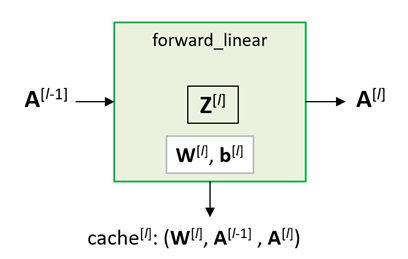
>
> The function `forward_linear` computes the value of $\mathbf{A}^{[l]}$ through two phases.
> 
> * The *summation phase* computes the following equations:
> 
>     $$\mathbf{Z}^{[l]} = \mathbf{A}^{[l-1]}\mathbf{W}^{[l]} + \mathbf{b}^{[l]T}$$
> 
>     where $\mathbf{A}^{[l-1]}$ (or `A_prev`) is the previous activations from layer $l-1$ and $\mathbf{A}^{[l]}$ (or `A`) is the current activations from layer $l$. Note that $\mathbf{A}^{[0]} = \mathbf{X}$
> 
> * The *activation phase* transforms the weighted input $\mathbf{Z}^{[l]}$ using a non-linear function. The function allows user to choose one of the two activation functions:
> 
>   * *sigmoid* activation:
>         
>     $$\mathbf{A}^{[l]}(\mathbf{Z}^{[l]}) = \frac{1}{1+e^{-\mathbf{Z}^{[l]}}}$$
>         
>   * *tanh* activation:
>     
>     $$\mathbf{A}^{[l]}(\mathbf{Z}^{[l]}) = \frac{e^{\mathbf{Z}^{[l]}}-e^{-\mathbf{Z}^{[l]}}}{e^{\mathbf{Z}^{[l]}}+e^{-\mathbf{Z}^{[l]}}}$$
>     
> The function also returns a cache value that stores all the tensors in the forward propagation that is required for backpropagation later.
>     
> $$\mathrm{cache}^{[l]} = (\mathbf{W}^{[l]}, \mathbf{A}^{[l-1]}, \mathbf{A}^{[l]})$$


In [7]:
reload(a1_mlp)

A1, cache1 = a1_mlp.forward_linear(X_train, weights[1], biases[1], "tanh")
A2, cache2 = a1_mlp.forward_linear(A1, weights[2], biases[2], "sigmoid")

print(f'Layer 1: input shape = {X_train.shape}, output shape = {A1.shape}')
print(f'Layer 2: input shape = {A1.shape}, output shape = {A2.shape}')

print(f'\nA1:\n{A1[:3,:5]}')
print(f'\nA2:\n{A2[:3,:5]}')

Layer 1: input shape = (242, 13), output shape = (242, 20)
Layer 2: input shape = (242, 20), output shape = (242, 1)

A1:
[[ 0.51847139  0.36277494  0.83422331 -0.46526295 -0.02792944]
 [-0.79793795  0.17945402 -0.19968765  0.77735434  0.67202721]
 [-0.75561479  0.87919656  0.17374779 -0.77535987  0.31208457]]

A2:
[[0.19726208]
 [0.74819208]
 [0.25122037]]


> **Task 2.3 (12 marks)** Forward propagation for the standard neural network
> 
> Complete the `a1_mlp.forward` function to perform forward propagation algorithm through an $L$-layered neural network. 
> * The model is parameterized by `weights` and `biases`. 
> * Given an input signal $\mathbf{X}$, forward propagation computes the predicted output $\hat{\mathbf{Y}}$ (or equivalently $\mathbf{A}^{[L]}$). To do that, use a *for* to perform forward propagation (`forward_linear`) through all layers $i = 1, \cdots, L$.
> * Clip the output of the network $\mathbf{A}^{[L]}$ so that it lies in the range [1e-5, 1-1e-5] for numerical stability when computing the cost later.
> * Save the cache of each layer `cache[i]` into a list called `caches`. Note that for the input layer, `caches[0]` is set to `None`.
>
> 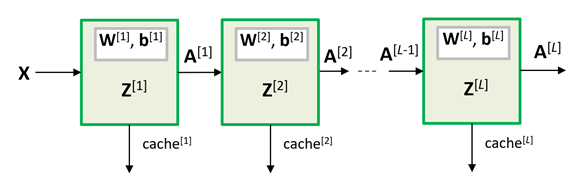

In [9]:
reload(a1_mlp)

y_hat, caches = a1_mlp.forward(X_train, weights, biases, act_functions)

print(f'Predicted value for first 5 samples):\n{y_hat[:5].T}')
print(f'\n{y_hat.shape = }')
print(f'{len(caches)   = }')

Predicted value for first 5 samples):
[[0.19726208 0.74819208 0.25122037 0.37627309 0.73408172]]

y_hat.shape = (242, 1)
len(caches)   = 3


> **Task 2.4 (5 marks)** Binary cross entropy cost function
>
> Implement the `a1_mlp.compute_cost` function to compute the binary cost entropy by comparing the predicted value $\hat{\mathbf{y}}$ and the actual label $\mathbf{y}$.
> 
> \begin{eqnarray*}
J(\mathbf{W}, \mathbf{b}) & = & \frac{1}{M} \sum_{i = 1}^{M} - y^{(i)}\log \hat{y}^{(i)} - (1-y^{(i)})\log (1- \hat{y}^{(i)}) \\
             & = & \textrm{mean}(-\mathbf{y}*\log(\hat{\mathbf{y}}) - (1-\mathbf{y})*\log(1-\hat{\mathbf{y}}))
\end{eqnarray*}
> 
> where $*$ is the element-wise operation product operation.

In [10]:
reload(a1_mlp)

cost = a1_mlp.compute_cost(y_hat, y_train)
print(f'{cost = :.4f}')

cost = 0.6522


---
## Section 3: Backpropagation

> **Task 3.1 (5 marks)** Backpropagation for the cost layer
>
> Implement the `a1_mlp.backprop_cost_layer` function to backprop through the cost function as shown in the figure below.
> 
> 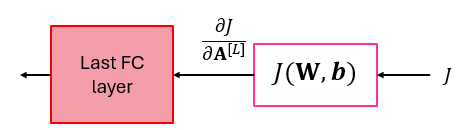
>
> Backpropagating through the cost layer gives us the gradient at the output of the last fully connected layer which is given by:
>
> $$\frac{\partial J}{\partial \hat{\mathbf{y}}} = \frac{1}{M} (\frac{1 - \mathbf{y}}{1 - \hat{\mathbf{y}}} - \frac{\mathbf{y}}{\hat{\mathbf{y}}})$$
>
> where $M$ is the number of samples, $\mathbf{y}$ is the actual label and $\hat{\mathbf{y}}$ is the predicted value.

In [12]:
reload(a1_mlp)

dAL = a1_mlp.backprop_cost_layer(y_hat, y_train)
print('dAL:\n', dAL[:5])
assert dAL.shape == y_hat.shape

dAL:
 [[ 0.00514767]
 [-0.00552296]
 [-0.01644863]
 [ 0.00662507]
 [-0.00562912]]


> **Task 3.2 (16 marks)** Backpropagation for the linear layer
>
> Complete the function `a1_mlp.backprop_linear_layer` which performs the backpropagation through *one* fully connected (FC) layer.
> 
> The inputs to the model are:
> * $\mathrm{cache}^{[l]} = (\mathbf{W}^{[l]}, \mathbf{A}^{[l-1]}, \mathbf{A}^{[l]})$ was generated when performing forward propagation (`forward_linear`) for all layers $l = 1, \cdots, L$ in `forward`) earlier. `cache[l]` stores the tensors required when backpropagating through layer $l$.
> * $\frac{\partial J}{\partial \mathbf{A}^{[l]}}$ is the upstream gradient of layer $l$ and is computed by `backprop_linear_layer` on layer $l+1$.
>   
> 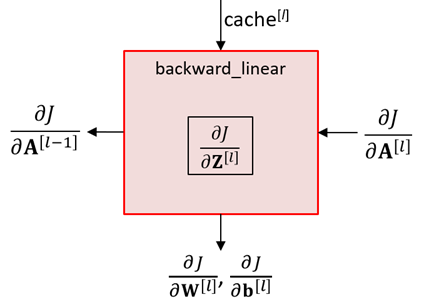
>
> To perform backpropagation through layer $[l]$, it first backprop through the *activation* function followed by the *summation* function:
>
> 1. **Backprop through activation phase**. The input is the upstream gradient $\frac{\partial J}{\partial \mathbf{A}^{[l]}}$. The output $\frac{\partial J}{\partial \mathbf{Z}^{[l]}}$ is computed as follows:
>   * For *sigmoid* activation:
>     $$\frac{\partial J}{\partial \mathbf{Z}^{[l]}} = \frac{\partial J}{\partial \mathbf{A}^{[l]}}* \mathbf{A}^{[l]}*(1-\mathbf{A}^{[l]})$$
> 
>    * For *tanh* activation:    
    $$\frac{\partial J}{\partial \mathbf{Z}^{[l]}} = \frac{\partial J}{\partial \mathbf{A}^{[l]}}* \big(1 - (\mathbf{A}^{[l]})^2\big)$$
> 
>   where $*$ is performing *element-wise* multiplication. <br> <br>
> 
> 2. **Backprop through summation phase**. The input is the upstream gradient $\frac{\partial J}{\partial \mathbf{Z}^{[l]}}$. The outputs $\frac{\partial J}{\partial \mathbf{W}^{[l]}}$, $\frac{\partial J}{\partial \mathbf{b}^{[l]}}$ and $\frac{\partial J}{\partial \mathbf{A}^{[l-1]}}$ are computed as follows:
> 
>     $$ \frac{\partial J}{\partial \mathbf{W}^{[l]}} =  \mathbf{A}^{[l-1]T} \frac{\partial J}{\partial \mathbf{Z}^{[l]}} $$
> 
>     $$ \frac{\partial J}{\partial \mathbf{b}^{[l]}} =  (\mathbf{1}^T \frac{\partial J}{\partial \mathbf{Z}^{[l]}})^T$$
> 
>     $$ \frac{\partial J}{\partial \mathbf{A}^{[l-1]}} = \frac{\partial J}{\partial \mathbf{Z}^{[l]}}\mathbf{W}^{[l]T}$$
> 
> Notes: $\frac{\partial J}{\partial \mathbf{b}^{[l]}}$ can also be implemented by summing the rows of $\frac{\partial J}{\partial \mathbf{Z}^{[l]}}$ and then transposing it to get the column vector.

In [13]:
reload(a1_mlp)

dA1, dW2, db2 = a1_mlp.backprop_linear_layer(dAL, caches[2], "sigmoid")
print('Backprop for sigmoid activation:')
print(f'dA1: Shape = {dA1.shape}: {dA1[0, :4]}')
print(f'dW2: Shape = {dW2.shape}: {dW2[:4].T}')
print(f'db2: Shape = {db2.shape}: {db2}')

dA1, dW2, db2 = a1_mlp.backprop_linear_layer(dAL, caches[2], "tanh")
print('\nBackprop for tanh activation:')
print(f'dA1: Shape = {dA1.shape}: {dA1[0, :4]}')
print(f'dW2: Shape = {dW2.shape}: {dW2[:4].T}')
print(f'db2: Shape = {db2.shape}: {db2}')


Backprop for sigmoid activation:
dA1: Shape = (242, 20): [-2.33174333e-04 -1.49739227e-05 -8.15358188e-04 -2.57690207e-04]
dW2: Shape = (20, 1): [[ 0.09207723 -0.04207996 -0.05582686  0.03932455]]
db2: Shape = (1, 1): [[-0.04487718]]

Backprop for tanh activation:
dA1: Shape = (242, 20): [-1.41522786e-03 -9.08826983e-05 -4.94873347e-03 -1.56402446e-03]
dW2: Shape = (20, 1): [[ 0.28671372 -0.13066431 -0.19654976  0.15021768]]
db2: Shape = (1, 1): [[-0.17797528]]


> **Task 3.3 (12 marks)**: Backpropagation for the standard neural network
>
> Complete the function `a1_mlp.backprop` to implement the backpropagation for the whole standard neural network. The backpropagation algorithm computes the gradient of the cost w.r.t. all model parameters, i.e., $\frac{\partial J}{\mathbf{W}^{[1]}}$, $\frac{\partial J}{\mathbf{b}^{[1]}}$, ..., $\frac{\partial J}{\mathbf{W}^{[L]}}$, $\frac{\partial J}{\mathbf{b}^{[L]}}$.
>
> 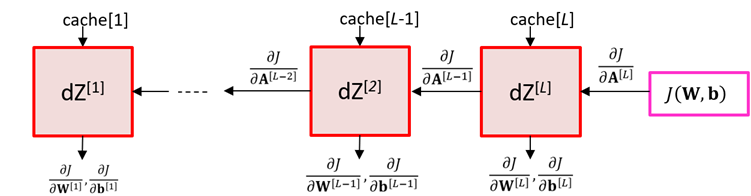
>
> The backpropagation algorithm first backprops through the cost function. Then, it backprops through the fully connected layers starting from the *last* linear layer back to layer 1.
> 
> * To backprop through the loss function, call the `backprop_cost_layer`
$$\frac{\partial J}{\partial \mathbf{A}^{[L]}} = \mathrm{backprop\_cost\_layer} (\mathbf{y}, \hat{\mathbf{y}})$$
> * To backprop through the fully connected layers, use a `for` loop and call `backprop_linear_layer` to process each layer iteratively starting from layer $L$ back to layer 1.
> 
> $$\frac{\partial J}{\partial \mathbf{A}^{[l-1]}} = \mathrm{backprop\_linear\_layer}(\frac{\partial J}{\partial \mathbf{A}^{[l]}}, \mathrm{cache}^{[l]}, \mathbf{A}^{[l]})$$

In [14]:
reload(a1_mlp)
weights_grad, biases_grad = a1_mlp.backprop(y_hat, y_train, act_functions, caches)

print('Shape of the weights   =', [w if w is None else w.shape for w in weights_grad])
print('Shape of the biases    =', [b if b is None else b.shape for b in biases])

print('\nweights[1] (first 3 rows):')
print(weights[1][:5,:3])

print('\nbiases[1] (first 3 rows):')
print(biases[1][:3])

print('\nweights[2] (first 3 rows):')
print(weights[2][:3])

print('\nbiases[2]:')
print(biases[2])

Shape of the weights   = [None, (13, 20), (20, 1)]
Shape of the biases    = [None, (20, 1), (1, 1)]

weights[1] (first 3 rows):
[[ 0.12228257 -0.03403832  0.1594499 ]
 [ 0.36081778 -0.05558228  0.01662429]
 [ 0.1817979   0.04218795 -0.02847064]
 [-0.11796454 -0.04570608 -0.27236084]
 [-0.05407948  0.08791504  0.36383236]]

biases[1] (first 3 rows):
[[0.]
 [0.]
 [0.]]

weights[2] (first 3 rows):
[[-0.28605695]
 [-0.01836992]
 [-1.00027682]]

biases[2]:
[[0.]]


---
## Section 4: Training and Evaluation

> **Task 4.1 (10 marks)** Batch Gradient Descent algorithm
>
> Implement the function `a1_mlp.train` which implements the gradient descent algorithm to train the network given a training set.
> 
> 1. Initialize parameters with Xavier initialization
> 2. Repeat for num_iters times:
>     1. Forward propagation
>     2. Compute cost
>     3. Backpropagation
>     4. Update parameters as follows: 
>         $$ \mathbf{W}^{[l]} = \mathbf{W}^{[l]} - \alpha \frac{\partial J}{\partial \mathbf{W}^{[l]}} \quad \forall l$$
>         $$ \mathbf{b}^{[l]} = \mathbf{b}^{[l]} - \alpha \frac{\partial J}{\partial \mathbf{b}^{[l]}} \quad \forall l$$
> 
> where $\alpha$ is the learning rate. The function returns the network parameters (`weights` and `biases`) and the training cost plot (`history`).

In [16]:
reload(a1_mlp)

weights, biases, history = a1_mlp.train (X_train, y_train, layer_sizes, act_functions, 
                                  lr=lr, num_iters=num_iters)

Iter   1 : training cost = 0.6522
Iter   5 : training cost = 0.4258
Iter  10 : training cost = 0.3902
Iter  15 : training cost = 0.3777
Iter  20 : training cost = 0.3707
Iter  25 : training cost = 0.3657
Iter  30 : training cost = 0.3616
Iter  35 : training cost = 0.3578
Iter  40 : training cost = 0.3543
Iter  45 : training cost = 0.3508
Iter  50 : training cost = 0.3473
Iter  55 : training cost = 0.3438
Iter  60 : training cost = 0.3403
Iter  65 : training cost = 0.3367
Iter  70 : training cost = 0.3330
Iter  75 : training cost = 0.3293
Iter  80 : training cost = 0.3255
Iter  85 : training cost = 0.3217
Iter  90 : training cost = 0.3177
Iter  95 : training cost = 0.3138
Iter 100 : training cost = 0.3098


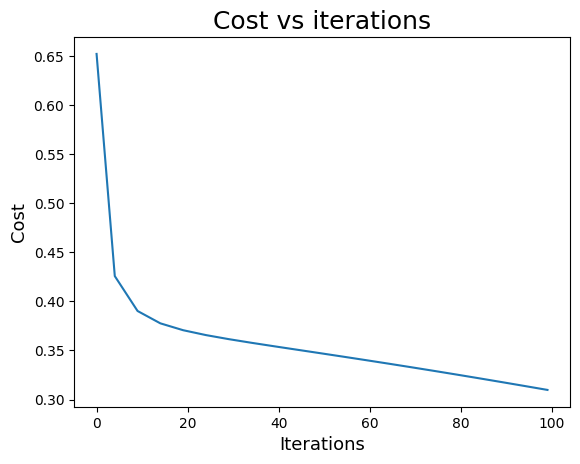

In [17]:
def plot_history_cost(history):
    plt.plot(history['iter'], history['cost'], label='cost')
    plt.ylabel('Cost', fontsize=13)
    plt.xlabel('Iterations', fontsize=13)
    plt.title('Cost vs iterations', fontsize=18)
    plt.show()

plot_history_cost(history)

> **Task 4.2 (8 marks)** Evaluate the trained model
>
> Complete the function `a1_mlp.evaluate` which uses the trained model to evaluate on the validation set `X_val`, `y_val`.
> The model parameters is stored in (`weights` and `biases`) and the activation functions used are stored in `act_functions`.
> The predicted label is acquired through thresholding:
> $$ \mathbf{y}_{\mathrm{pred}} =
  \begin{cases}
    1 & \text{if } \hat{\mathbf{y}} \geq 0.5\\
    0 & \text{otherwise}\\
  \end{cases}$$
> The compare the predicted label against the actual label `y_val`.


In [18]:
reload(a1_mlp)

y_hat, y_pred, acc = a1_mlp.evaluate(X_val, y_val, weights, biases, act_functions)
print(f'Validation accuracy = {acc:.4f}')

Validation accuracy = 0.8852


<center> --- END OF ASSESSMENT --- </center>